In [30]:
import pandas as pd
import numpy as np

In [31]:
df=pd.read_csv('data-1.csv')

In [32]:
df.shape

(7086, 19)

In [33]:
df.isnull().sum()

Au                     5175
Az                     5175
B prime                   0
B/G                    5175
Bulk modulus              0
C11                    5175
C12                    5175
C44                    5175
Composition               0
Crystal structure         0
EOS                       0
Formation enthalpy        0
Group                     0
Lattice constant          0
Poisson ratio          5175
Shear modulus          5175
Total energy              0
Wigner-Seitz radius       0
Youngs modulus         5175
dtype: int64

In [34]:
df=df.dropna()

In [35]:
df.head()

,Au,Az,B prime,B/G,Bulk modulus,C11,C12,C44,Composition,Crystal structure,EOS,Formation enthalpy,Group,Lattice constant,Poisson ratio,Shear modulus,Total energy,Wigner-Seitz radius,Youngs modulus
0,0.408729,1.778260,6.364219,1.962925,227.518713,337.005724,172.775208,146.022273,Al0.05 Co0.25 Cr0.5 Mn0.2,bcc,birchmurnaghan,0.002317,training set,2.831552,0.282254,115.908003,-2235.368578,2.634616,297.247108
1,2.789709,4.079638,4.427844,1.431173,138.835047,194.161086,111.172027,169.282652,Al0.03846154 Co0.23076923 Mn0.34615385 Ni0.384...,fcc,birchmurnaghan,-0.000113,training set,3.562273,0.216635,97.007904,-2634.515025,2.630732,236.046334
2,3.306753,4.535126,5.261057,1.799802,178.500707,231.398652,152.051735,179.924138,Al0.04545455 Co0.36363636 Fe0.45454545 V0.1363...,fcc,birchmurnaghan,-0.003998,training set,3.551613,0.265603,99.177960,-2450.711050,2.622860,251.039900
3,0.823472,2.239748,6.703001,1.805281,174.259962,253.679636,134.550125,133.410016,Al0.03448276 Co0.34482759 Mn0.34482759 V0.2758...,bcc,birchmurnaghan,-0.005270,training set,2.853933,0.266204,96.527874,-2301.006970,2.655441,244.447920
4,2.356656,3.693105,6.878843,1.887702,229.217007,302.913469,192.368776,204.126596,Al0.05882353 Co0.58823529 Cr0.23529412 Ni0.117...,fcc,birchmurnaghan,-0.004157,training set,3.520652,0.274880,121.426488,-2521.830265,2.599995,309.608342


In [36]:
df['Composition']

0                               Al0.05 Co0.25 Cr0.5 Mn0.2
1       Al0.03846154 Co0.23076923 Mn0.34615385 Ni0.384...
2       Al0.04545455 Co0.36363636 Fe0.45454545 V0.1363...
3       Al0.03448276 Co0.34482759 Mn0.34482759 V0.2758...
4       Al0.05882353 Co0.58823529 Cr0.23529412 Ni0.117...
                              ...                        
1906                           Al0.25 Ni0.25 Ti0.25 W0.25
1907                           Hf0.25 Ni0.25 Ti0.25 W0.25
1908                           Mn0.25 Ni0.25 Ti0.25 W0.25
1909                           Ni0.25 Ti0.25 W0.25 Zr0.25
1910                           Ta0.25 Ti0.25 W0.25 Zr0.25
Name: Composition, Length: 1911, dtype: object

In [37]:
import re

def split_elements(string):
    pattern = r'([A-Z][a-z]*)(\d*\.\d+)'
    elements = re.findall(pattern, string)
    return elements


data=[]

for row in df['Composition']:
    string= row
    elements=split_elements(string)
    data.append(elements)

In [39]:
s=set()
for d in data:
    for i in d:
        for j in i:
            s.add(j)
            break
cols=list(s)
print(cols)
print(len(cols))

['Co', 'Cr', 'Zr', 'Fe', 'Al', 'Mo', 'Ta', 'Cu', 'W', 'V', 'Mn', 'Hf', 'Ti', 'Nb', 'Ni']
15


In [40]:
dict(data[0])

{'Al': '0.05', 'Co': '0.25', 'Cr': '0.5', 'Mn': '0.2'}

In [41]:
rows = []
for row in data:
    row_dict = dict(row)
    row_data = {element: float(row_dict.get(element, 0)) for element in cols}
    rows.append(row_data)

In [42]:
compdf=pd.DataFrame(rows)

In [43]:
compdf.head()

,Co,Cr,Zr,Fe,Al,Mo,Ta,Cu,W,V,Mn,Hf,Ti,Nb,Ni
0,0.250000,0.500000,0.0,0.000000,0.050000,0.0,0.0,0.0,0.0,0.000000,0.200000,0.0,0.0,0.0,0.000000
1,0.230769,0.000000,0.0,0.000000,0.038462,0.0,0.0,0.0,0.0,0.000000,0.346154,0.0,0.0,0.0,0.384615
2,0.363636,0.000000,0.0,0.454545,0.045455,0.0,0.0,0.0,0.0,0.136364,0.000000,0.0,0.0,0.0,0.000000
3,0.344828,0.000000,0.0,0.000000,0.034483,0.0,0.0,0.0,0.0,0.275862,0.344828,0.0,0.0,0.0,0.000000
4,0.588235,0.235294,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.117647


In [44]:
compdf.shape

(1911, 15)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

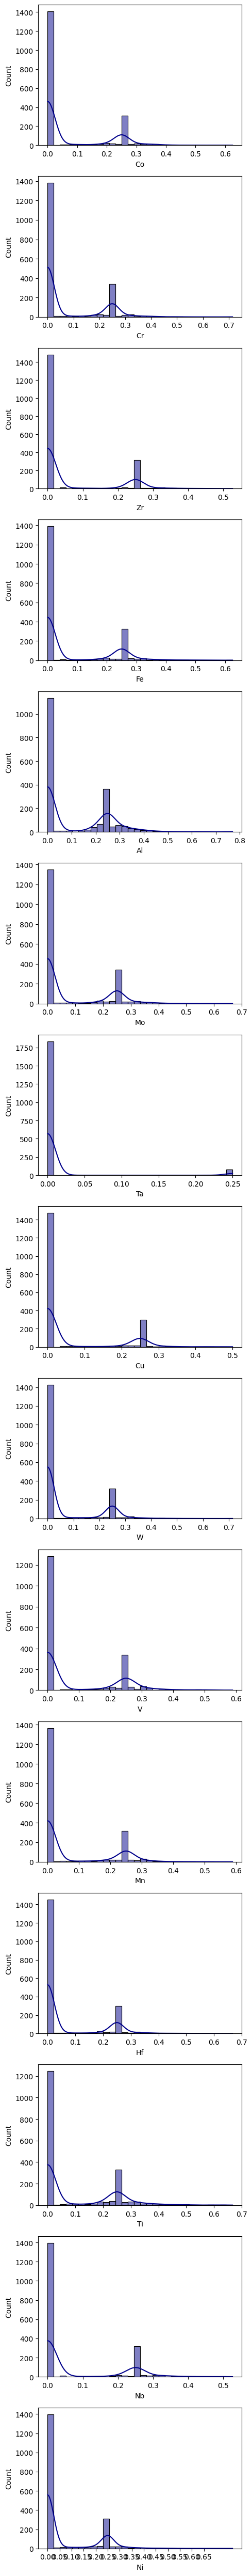

In [46]:
fig, axs = plt.subplots(15, 1,figsize=(5,50))
i=0
for ele in cols[:]:
    sns.histplot(compdf[ele], kde=True, bins=30, color='darkblue', edgecolor='black',ax=axs[i])
    i=i+1
    plt.xticks(np.arange(0, 0.7, 0.05))

plt.tight_layout()
plt.show()

In [47]:
df['Crystal structure'].unique()

array(['bcc', 'fcc'], dtype=object)

In [48]:
df['EOS'].unique()

array(['birchmurnaghan'], dtype=object)

In [49]:
df.head()

,Au,Az,B prime,B/G,Bulk modulus,C11,C12,C44,Composition,Crystal structure,EOS,Formation enthalpy,Group,Lattice constant,Poisson ratio,Shear modulus,Total energy,Wigner-Seitz radius,Youngs modulus
0,0.408729,1.778260,6.364219,1.962925,227.518713,337.005724,172.775208,146.022273,Al0.05 Co0.25 Cr0.5 Mn0.2,bcc,birchmurnaghan,0.002317,training set,2.831552,0.282254,115.908003,-2235.368578,2.634616,297.247108
1,2.789709,4.079638,4.427844,1.431173,138.835047,194.161086,111.172027,169.282652,Al0.03846154 Co0.23076923 Mn0.34615385 Ni0.384...,fcc,birchmurnaghan,-0.000113,training set,3.562273,0.216635,97.007904,-2634.515025,2.630732,236.046334
2,3.306753,4.535126,5.261057,1.799802,178.500707,231.398652,152.051735,179.924138,Al0.04545455 Co0.36363636 Fe0.45454545 V0.1363...,fcc,birchmurnaghan,-0.003998,training set,3.551613,0.265603,99.177960,-2450.711050,2.622860,251.039900
3,0.823472,2.239748,6.703001,1.805281,174.259962,253.679636,134.550125,133.410016,Al0.03448276 Co0.34482759 Mn0.34482759 V0.2758...,bcc,birchmurnaghan,-0.005270,training set,2.853933,0.266204,96.527874,-2301.006970,2.655441,244.447920
4,2.356656,3.693105,6.878843,1.887702,229.217007,302.913469,192.368776,204.126596,Al0.05882353 Co0.58823529 Cr0.23529412 Ni0.117...,fcc,birchmurnaghan,-0.004157,training set,3.520652,0.274880,121.426488,-2521.830265,2.599995,309.608342


In [50]:
df=df.drop(columns=['Composition','EOS','Group'])

In [51]:
df.head()

,Au,Az,B prime,B/G,Bulk modulus,C11,C12,C44,Crystal structure,Formation enthalpy,Lattice constant,Poisson ratio,Shear modulus,Total energy,Wigner-Seitz radius,Youngs modulus
0,0.408729,1.778260,6.364219,1.962925,227.518713,337.005724,172.775208,146.022273,bcc,0.002317,2.831552,0.282254,115.908003,-2235.368578,2.634616,297.247108
1,2.789709,4.079638,4.427844,1.431173,138.835047,194.161086,111.172027,169.282652,fcc,-0.000113,3.562273,0.216635,97.007904,-2634.515025,2.630732,236.046334
2,3.306753,4.535126,5.261057,1.799802,178.500707,231.398652,152.051735,179.924138,fcc,-0.003998,3.551613,0.265603,99.177960,-2450.711050,2.622860,251.039900
3,0.823472,2.239748,6.703001,1.805281,174.259962,253.679636,134.550125,133.410016,bcc,-0.005270,2.853933,0.266204,96.527874,-2301.006970,2.655441,244.447920
4,2.356656,3.693105,6.878843,1.887702,229.217007,302.913469,192.368776,204.126596,fcc,-0.004157,3.520652,0.274880,121.426488,-2521.830265,2.599995,309.608342


In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Crystal structure']=le.fit_transform(df['Crystal structure'])

In [53]:
le.inverse_transform(df['Crystal structure'])

array(['bcc', 'fcc', 'fcc', ..., 'bcc', 'bcc', 'bcc'], dtype=object)

In [56]:
df_comb=pd.concat([df,compdf],axis=1)

In [58]:
df_comb.head()

,Au,Az,B prime,B/G,Bulk modulus,C11,C12,C44,Crystal structure,Formation enthalpy,...,Mo,Ta,Cu,W,V,Mn,Hf,Ti,Nb,Ni
0,0.408729,1.778260,6.364219,1.962925,227.518713,337.005724,172.775208,146.022273,0,0.002317,...,0.0,0.0,0.0,0.0,0.000000,0.200000,0.0,0.0,0.0,0.000000
1,2.789709,4.079638,4.427844,1.431173,138.835047,194.161086,111.172027,169.282652,1,-0.000113,...,0.0,0.0,0.0,0.0,0.000000,0.346154,0.0,0.0,0.0,0.384615
2,3.306753,4.535126,5.261057,1.799802,178.500707,231.398652,152.051735,179.924138,1,-0.003998,...,0.0,0.0,0.0,0.0,0.136364,0.000000,0.0,0.0,0.0,0.000000
3,0.823472,2.239748,6.703001,1.805281,174.259962,253.679636,134.550125,133.410016,0,-0.005270,...,0.0,0.0,0.0,0.0,0.275862,0.344828,0.0,0.0,0.0,0.000000
4,2.356656,3.693105,6.878843,1.887702,229.217007,302.913469,192.368776,204.126596,1,-0.004157,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.117647


In [60]:
df_comb.columns

Index(['Au', 'Az', 'B prime', 'B/G', 'Bulk modulus', 'C11', 'C12', 'C44',
       'Crystal structure', 'Formation enthalpy', 'Lattice constant',
       'Poisson ratio', 'Shear modulus', 'Total energy', 'Wigner-Seitz radius',
       'Youngs modulus', 'Co', 'Cr', 'Zr', 'Fe', 'Al', 'Mo', 'Ta', 'Cu', 'W',
       'V', 'Mn', 'Hf', 'Ti', 'Nb', 'Ni'],
      dtype='object')